#### Задание (0/2)
- [x] Найти в открытых источниках или составить самостоятельно таблицу среднего дохода (PPP) в зависимости от страны
- [x] Построить график корреляции между средним доходом (PPP) и ценой подписки 

#### Вопросы (0/7)
- [x] Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны.
- [x] Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента
- [x] Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?
- [x] Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?
- [x] Какой процент среднего дохода россиянина будет составлять подписка Netflix?
- [x] На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)
- [x] В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?

#### Ограничения (0/5)
- [x] Данные, используемые в ноутбуке с решением, должны подтягиваться через url c удаленного источника (википедии, google sheets, etc)
- [x] Нельзя использовать циклы for, while для работы с данными. Используйте инструменты Pandas
- [x] Должны присутствовать методы df.apply, pd.merge, pd.concat
- [x] В приведенной статье есть готовые выводы, их нельзя использовать.
- [x] Решение оформить в виде репозитория на github.com



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Найти в открытых источниках или составить самостоятельно таблицу среднего дохода (PPP) в зависимости от страны

In [2]:
gni = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GNI_(PPP)_per_capita')[1]
gni.columns = gni.loc[1]
gni = gni.rename(columns={'GNI PPP per capita(Int$)[1]': 'GNI PPP per capita(Int$)'})
gni.columns.name = None
gni = gni.loc[2:, 'Economy':].reset_index(drop=True)
gni.loc[:, 'Year'] = gni.loc[:, 'Year'].apply(int)
gni.loc[:, 'GNI PPP per capita(Int$)'] = gni.loc[:, 'GNI PPP per capita(Int$)'].apply(float)
gni

,Economy,GNI PPP per capita(Int$),Year
0,Macau (China),117340.0,2019
1,Qatar,88070.0,2020
2,Singapore,86480.0,2020
3,Luxembourg,83690.0,2020
4,Bermuda (GB),83150.0,2020
...,...,...,...
193,Democratic Republic of the Congo,1100.0,2020
194,South Sudan,1080.0,2015
195,Central African Republic,1040.0,2020
196,Somalia,870.0,2020


#### Построить график корреляции между средним доходом (PPP) и ценой подписки

In [3]:
netflix = pd.read_csv('https://docs.google.com/spreadsheets/d/1dQeWjcS1WSF4J2jdS_mvbmuQ7-sbn6zwkytl7qpOyzQ/export?gid=1012322044&format=csv')

def rename_countries(country):
    mapping = {
        'Czechia': 'Czech Republic',
        'Hong Kong': 'Hong Kong (China)',  
    }
    return mapping.get(country, country)

netflix.loc[:, 'Country'] = netflix.loc[:, 'Country'].apply(rename_countries)
netflix = netflix.merge(gni, left_on='Country', right_on='Economy', how='left').drop(columns='Economy')

In [4]:
# GNI data is not available for all countries
netflix.loc[netflix.merge(gni, left_on='Country', right_on='Economy', how='left').loc[:, 'Economy'].isna()]

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),GNI PPP per capita(Int$),Year
19,gi,Gibraltar,6167,4079,2088,9.03,14.67,20.32,NaN,NaN
33,li,Liechtenstein,3048,1712,1336,12.88,20.46,26.96,NaN,NaN
38,mc,Monaco,5804,3806,1998,9.03,13.54,18.06,NaN,NaN
49,sm,San Marino,2310,1937,373,9.03,14.67,20.32,NaN,NaN
57,tw,Taiwan,5105,3134,1971,9.74,11.90,14.07,NaN,NaN


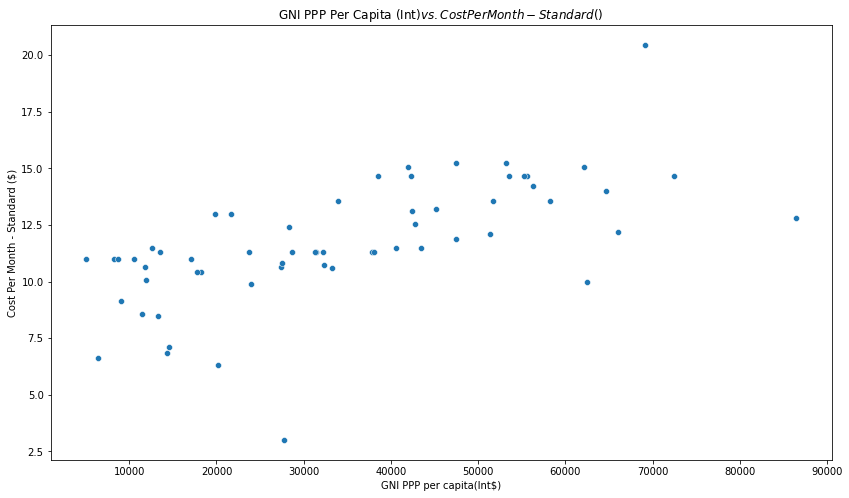

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(14,8))
sns.scatterplot(data=netflix, x='GNI PPP per capita(Int$)', y='Cost Per Month - Standard ($)')
ax.set_title('GNI PPP Per Capita (Int$) vs. Cost Per Month - Standard ($)')
plt.show()

#### Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны. 

In [6]:
currencies = pd.read_html('https://en.wikipedia.org/wiki/List_of_circulating_currencies')[0].iloc[:, [0,1,3]]
currencies.columns = [col.split('[')[0] for col in currencies.columns]

def rename_countries_in_currency_df(country):
    mapping = {
        'Netherlands[H]': 'Netherlands',
        'Hong Kong': 'Hong Kong (China)',  
        'Korea, South': 'South Korea'
    }
    return mapping.get(country, country)

currencies.loc[:, 'State or territory'] = currencies.loc[:, 'State or territory'].apply(rename_countries_in_currency_df)
currencies = currencies.loc[~(
    (
        currencies.loc[:, 'ISO code'].isin(['(none)', 'VED'])
    )|(
        (currencies.loc[:, 'ISO code'] == 'BND') & (currencies.loc[:, 'State or territory'] == 'Singapore')
    )
)]

netflix = netflix.merge(currencies, left_on='Country', right_on='State or territory', how='left').drop(columns=['State or territory'])

netflix.loc[:, ['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)', 'ISO code']].groupby('ISO code').mean()

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
ISO code,,,
ARS,3.740000,6.300000,9.260000
AUD,7.840000,12.120000,16.390000
BGN,9.030000,11.290000,13.540000
BOB,7.990000,10.990000,13.990000
BRL,4.610000,7.110000,9.960000
CAD,7.910000,11.870000,15.030000
CHF,12.880000,20.460000,26.960000
CLP,7.070000,9.910000,12.740000
COP,4.310000,6.860000,9.930000


#### Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента

In [7]:
continents = pd.read_html('https://statisticstimes.com/geography/countries-by-continents.php')[2].loc[:, ['Country or Area', 'Continent']]

continents.loc[continents.loc[:, 'Country or Area'].apply(lambda x: 'Bol' in x)]
def rename_countries_in_continents_df(country):
    mapping = {
        'Bolivia (Plurinational State of)': 'Bolivia',
        'Venezuela (Bolivarian Republic of)': 'Venezuela',
        'China, Hong Kong Special Administrative Region': 'Hong Kong (China)',
        'Czechia': 'Czech Republic',
        'Republic of Moldova': 'Moldova',
        'Russian Federation': 'Russia',
        'Republic of Korea': 'South Korea',
        'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
        'United States of America': 'United States'
    }
    return mapping.get(country, country)
continents.loc[:, 'Country or Area'] = continents.loc[:, 'Country or Area'].apply(rename_countries_in_continents_df)
continents = continents.append({'Country or Area': 'Taiwan', 'Continent': 'Asia'}, ignore_index=True)
netflix = netflix.merge(continents, left_on='Country', right_on='Country or Area', how='left').drop(columns='Country or Area')
netflix.loc[:, ['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)', 'Continent']].groupby('Continent').mean()

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Continent,,,
Africa,6.260000,10.050000,12.580000
Asia,7.636667,10.404167,12.966667
Europe,9.230294,13.304412,17.545588
North America,8.081667,11.876667,15.205000
Oceania,8.320000,12.325000,16.665000
South America,6.709000,9.619000,12.555000


#### Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?

In [8]:
netflix.loc[
    netflix.loc[:, 'Country'] == 'Czech Republic', ['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']
].applymap(lambda x: x / netflix.loc[netflix.loc[:, 'Country'] == 'Czech Republic', 'GNI PPP per capita(Int$)'].values[0])

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
12,0.000218,0.000283,0.000349


#### Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?

In [9]:
netflix.sort_values(by='No. of TV Shows', ascending=False).head(5).loc[:, ['Country', 'No. of TV Shows']]

,Country,No. of TV Shows
12,Czech Republic,5234
51,Slovakia,5055
6,Bulgaria,4819
24,Hungary,4802
61,United Kingdom,4551


#### Какой процент среднего дохода россиянина будет составлять подписка Netflix?

In [10]:
netflix.loc[
    netflix.loc[:, 'Country'] == 'Russia', ['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']
].applymap(lambda x: f"{100 * x / netflix.loc[netflix.loc[:, 'Country'] == 'Russia', 'GNI PPP per capita(Int$)'].values[0]:.3f}%")

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
48,0.030%,0.039%,0.049%


#### На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)

In [11]:
netflix

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),GNI PPP per capita(Int$),Year,Currency,ISO code,Continent
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,20210.0,2020.0,Argentine peso,ARS,South America
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,51420.0,2020.0,Australian dollar,AUD,Oceania
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,55590.0,2020.0,Euro,EUR,Europe
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,53180.0,2020.0,Euro,EUR,Europe
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,8250.0,2020.0,Bolivian boliviano,BOB,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,ua,Ukraine,5336,3261,2075,5.64,8.46,11.29,13260.0,2020.0,Ukrainian hryvnia,UAH,Europe
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48,45170.0,2020.0,British pound[F],GBP,Europe
62,us,United States,5818,3826,1992,8.99,13.99,17.99,64610.0,2020.0,United States dollar,USD,North America
63,uy,Uruguay,4989,3154,1835,8.99,12.99,15.99,21630.0,2020.0,Uruguayan peso,UYU,South America


In [12]:
netflix['Cost Per Title (Basic)'] = netflix.loc[:, 'Cost Per Month - Basic ($)'] / netflix.loc[:, 'Total Library Size']
netflix = netflix.sort_values(by='Cost Per Title (Basic)').reset_index(drop=True)
netflix['Efficiency Rating'] = netflix.index + 1
netflix.loc[netflix.loc[:, 'Country'] == 'Russia', ['Country', 'Cost Per Title (Basic)', 'Efficiency Rating']]

,Country,Cost Per Title (Basic),Efficiency Rating
25,Russia,0.001424,26


#### В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?

In [13]:
netflix.loc[
    netflix.loc[:, 'Efficiency Rating'] == 1
]

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),GNI PPP per capita(Int$),Year,Currency,ISO code,Continent,Cost Per Title (Basic),Efficiency Rating
0,tr,Turkey,4639,2930,1709,1.97,3.0,4.02,27780.0,2020.0,Turkish lira,TRY,Asia,0.000425,1
